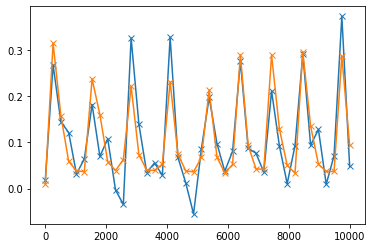

In [10]:
import pyabc
from study_abc_noise.model import HodgkinHuxleyModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging
import pickle
%matplotlib inline

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

n_t = 40
mv = ModelVars(n_t=n_t, basedir="..", noise_std=0.05)

# model
model = mv.get_model()
model_noisy = mv.get_model_noisy()

prior = mv.get_prior()
distance = mv.get_distance()
kernel = mv.get_kernel()
acceptor = pyabc.StochasticAcceptor()
eps = pyabc.Temperature()

# data
def get_data():
    try:
        data_nonoise, data = pickle.load(open(f"data_{n_t}.dat", 'rb'))
    except:
        data_nonoise = model(mv.p_true)
        data = mv.add_noise_to_data(data_nonoise)
        pickle.dump((data_nonoise, data), open(f"data_{n_t}.dat", 'wb'))
    return data_nonoise, data

data_nonoise, data = get_data()

plt.plot(data['K'], 'x-')
plt.plot(data_nonoise['K'], 'x-')

In [11]:
abc = pyabc.ABCSMC(model, prior, distance)
abc.new("sqlite:///h_incorrect.db", data)
abc.run(max_nr_populations=15)

DEBUG:Epsilon:init quantile_epsilon initial_epsilon=from_sample, quantile_multiplier=1
INFO:History:Start <ABCSMC(id=3, start_time=2019-12-08 20:31:28.549388, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 0.7017423695094273
INFO:ABC:t: 0, eps: 0.7017423695094273.
Process Process-25:
Process Process-26:
Process Process-27:
Process Process-28:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/yannik/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 30, in work
    new_sim = simulate_one()
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home

KeyboardInterrupt: 

  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/yannik/pyabc/pyabc/smc.py", line 595, in simulate_one
    weight_function)
  File "/home/yannik/pyabc/pyabc/smc.py", line 680, in _evaluate_proposal
    x_0)
  File "/home/yannik/pyabc/pyabc/smc.py", line 595, in simulate_one
    weight_function)
  File "/home/yannik/pyabc/pyabc/smc.py", line 595, in simulate_one
    weight_function)
  File "/home/yannik/pyabc/pyabc/smc.py", line 680, in _evaluate_proposal
    x_0)
  File "/home/yannik/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 30, in work
    new_sim = simulate_one()
  File "/home/yannik/pyabc/pyabc/smc.py", line 595, in simulate_one
    weight_function)
  File "/home/yannik/pyabc/pyabc/smc.py", line 680, in _evaluate_proposal
    x_0)
  File "/home/yannik/pyabc/pyabc/model.py", line 227, in accept
    sum_stats_calculator)
  File "/home/yannik/pyabc/pyabc/model.py", lin

In [6]:
abc = pyabc.ABCSMC(model, prior, kernel, eps=eps, acceptor=acceptor)
abc.new("sqlite:///h_stochastic_acceptor.db", data)
abc.run()

INFO:History:Start <ABCSMC(id=2, start_time=2019-12-08 20:29:46.926691, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=7.8427e+01 for t=0.
INFO:ABC:t: 0, eps: 109.25909854419014.
DEBUG:Acceptor:Encountered pd=7.8738e+01 > c=7.8427e+01, thus weight=1.0028e+00.
Process Process-19:
Traceback (most recent call last):
Process Process-20:
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process Process-17:
Traceback (most recent call last):
Process Process-18:
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/yannik/pyabc/pyabc/sampler/multicore_evaluati

KeyboardInterrupt: 

  File "/home/yannik/pyabc/pyabc/model.py", line 227, in accept
    sum_stats_calculator)
  File "/home/yannik/anaconda3/lib/python3.7/subprocess.py", line 474, in run
    stdout, stderr = process.communicate(input, timeout=timeout)
  File "/home/yannik/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 30, in work
    new_sim = simulate_one()
  File "/home/yannik/pyabc/pyabc/model.py", line 121, in summary_statistics
    raw_data = self.sample(pars)
  File "/home/yannik/pyabc/pyabc/model.py", line 227, in accept
    sum_stats_calculator)
  File "/home/yannik/pyabc/pyabc/smc.py", line 595, in simulate_one
    weight_function)
  File "/home/yannik/anaconda3/lib/python3.7/subprocess.py", line 926, in communicate
    stdout = self.stdout.read()
  File "/home/yannik/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 55, in model
    val =

14 14


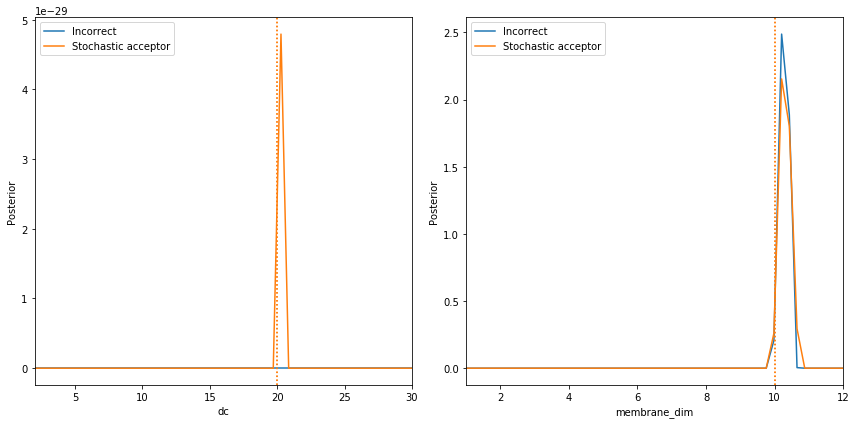

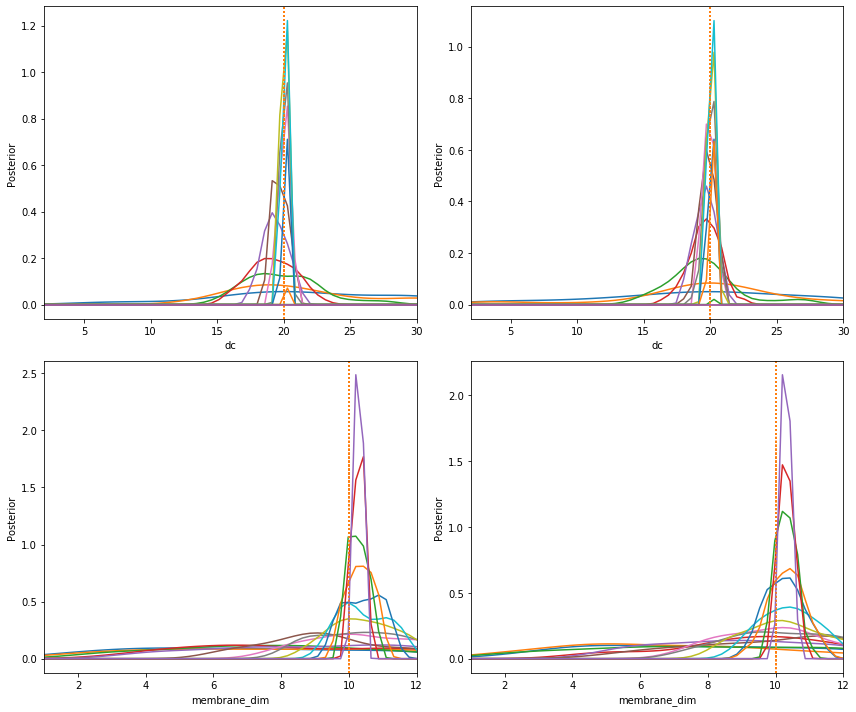

In [2]:
def plot(h, x, ax, limits, p_true):
    for t in range(0, h.max_t + 1):
        pyabc.visualization.plot_kde_1d_highlevel(
            h, t=t, x=x, xmin=limits[x][0], xmax=limits[x][1], ax=ax,
            refval=p_true, label=f"Iter. {t}")
    #ax.legend()
    return ax

h_incorrect = pyabc.History("sqlite:///h_incorrect.db")
h = pyabc.History("sqlite:///h_stochastic_acceptor.db")
print(h_incorrect.max_t, h.max_t)

fig = plt.figure()

i = 0
for p in mv.p_true:
    i += 1
    ax = fig.add_subplot(1, 2, i)
    for h, label in [(h_incorrect, "Incorrect"), (h, "Stochastic acceptor")]:
        pyabc.visualization.plot_kde_1d_highlevel(h, x=p, xmin=mv.limits[p][0], xmax=mv.limits[p][1], ax=ax,
                                                 refval=mv.p_true, label=label)
    ax.legend()
fig.set_size_inches((12, 6))
fig.tight_layout()

fig = plt.figure()
i = 0
for p in mv.p_true:
    i += 1
    ax = fig.add_subplot(2, 2, i)
    plot(h_incorrect, p, ax, mv.limits, mv.p_true)
    i += 1
    ax = fig.add_subplot(2, 2, i)
    plot(h, p, ax, mv.limits, mv.p_true)
    
fig.set_size_inches((12, 10))
fig.tight_layout()